In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv


In [3]:
df = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
df2 = df.sort_values(by=['Confirmed'], ascending=False)
df2.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
280777,280778,04/27/2021,NaN,France,2021-04-28 04:20:32,5490025.0,102907.0,300619.0
280013,280014,04/26/2021,NaN,France,2021-04-27 04:20:52,5460793.0,102567.0,299611.0
279249,279250,04/25/2021,NaN,France,2021-04-26 04:21:04,5456417.0,102190.0,298410.0
278485,278486,04/24/2021,NaN,France,2021-04-25 04:20:32,5432085.0,102046.0,297886.0
277721,277722,04/23/2021,NaN,France,2021-04-24 04:20:38,5399600.0,101830.0,296453.0


In [6]:
print(df2.shape)

(281487, 8)


In [7]:
df3 = df2.dropna()
print(df3.shape)

(209353, 8)


In [8]:
df3.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
280421,280422,04/26/2021,Maharashtra,India,2021-04-27 04:20:52,4343727.0,65284.0,3601796.0
281185,281186,04/27/2021,Maharashtra,India,2021-04-28 04:20:32,4343727.0,65284.0,3601796.0
279657,279658,04/25/2021,Maharashtra,India,2021-04-26 04:21:04,4295027.0,64760.0,3530060.0
278893,278894,04/24/2021,Maharashtra,India,2021-04-25 04:20:32,4228836.0,63928.0,3468610.0
278129,278130,04/23/2021,Maharashtra,India,2021-04-24 04:20:38,4161676.0,63252.0,3404792.0


In [16]:

df4 = df3.groupby(['Country/Region'], sort=False)['Confirmed','Recovered'].max()
df4.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered
Country/Region,,
India,4343727.0,3601796.0
UK,3852904.0,4183.0
US,3736069.0,6399531.0
Brazil,2856225.0,2504568.0
Russia,1085094.0,985769.0
Peru,816973.0,1714995.0
Italy,797658.0,711865.0
Colombia,774663.0,715791.0
Germany,724667.0,639800.0


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cases')

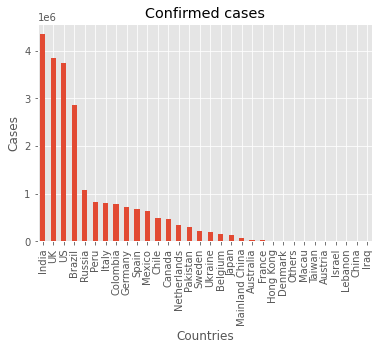

In [18]:
from matplotlib import pyplot as plt
df4['Confirmed'].plot(kind="bar", title="test")
plt.title("Confirmed cases")
plt.xlabel("Countries")
plt.ylabel("Cases")